In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import os
import sys

In [2]:
df1 = pd.read_csv('results_20190920_083532.log', sep=',')

In [3]:
df1 = df1.drop(columns=['jvm_short','duration'])

In [4]:
#Cleaning data and setting the correct datatypes
df1=df1.loc[df1['failed_req']!='FAILED']
df1['failed_req']=pd.to_numeric(df1['failed_req'])
df1['compl_req']=pd.to_numeric(df1['compl_req'])
df1['req_per_sec']=pd.to_numeric(df1['req_per_sec'])
df1['time_per_req_avg']=pd.to_numeric(df1['time_per_req_avg'])
df1['cpus']=pd.to_numeric(df1['cpus'])
df1['concurrency']=pd.to_numeric(df1['concurrency'])

,jvm_descr,jvm_vendor,jvm_major_version,gc_descr,gc_short,framework,memflag,compl_req,failed_req,req_per_sec,time_per_req_avg,cpus,concurrency
0,OpenJ9 8,OpenJ9,8,Generational Concurrent policy,GenCon,Akka,-Xmx512m -Xms512m,10506,0,525.29,1.904,1,1
1,OpenJ9 8,OpenJ9,8,Generational Concurrent policy,GenCon,Akka,-Xmx512m -Xms512m,8659,0,432.93,2.310,1,4
2,OpenJ9 8,OpenJ9,8,Generational Concurrent policy,GenCon,Akka,-Xmx512m -Xms512m,8976,0,448.79,2.228,1,8
3,OpenJ9 8,OpenJ9,8,Generational Concurrent policy,GenCon,Akka,-Xmx512m -Xms512m,9693,0,484.64,2.063,4,1
4,OpenJ9 8,OpenJ9,8,Generational Concurrent policy,GenCon,Akka,-Xmx512m -Xms512m,8855,0,442.56,2.260,4,4


Train Accuracy ::  0.9989440896842571
Test Accuracy  ::  0.9931063688340301


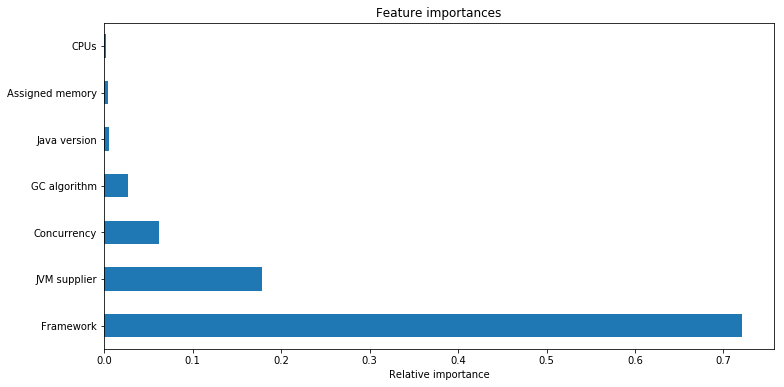

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df1.columns:
    if df1[column_name].dtype == object:
        df1[column_name] = le.fit_transform(df1[column_name])
    else:
        pass
        
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)
Xtest = test[['cpus','concurrency','jvm_vendor','jvm_major_version','gc_short','framework','memflag']]  #independent columns
ytest = test['compl_req']    #target column i.e price range

Xtrain = train[['cpus','concurrency','jvm_vendor','jvm_major_version','gc_short','framework','memflag']]  #independent columns
ytrain = train['compl_req']    #target column i.e price range

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(Xtrain, ytrain)

predictions = forest.predict(Xtest)
print ("Train Accuracy :: ", forest.score(Xtrain, ytrain))
print ("Test Accuracy  :: ", forest.score(Xtest, ytest))
figure(num=None, figsize=(12, 6))
#print(forest.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
columnLookup={'cpus':'CPUs','jvm_major_version':'Java version','memflag':'Assigned memory','gc_short':'GC algorithm','concurrency':'Concurrency','framework':'Framework','jvm_vendor':'JVM supplier'}
X.columns= [ columnLookup.get(item,item) for item in X.columns ]
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature importances')
#plt.ylabel('Feature')
plt.xlabel('Relative importance')
plt.show()